# Final Project (44-620)

### Student Name: Lindsey Sullivan
### GitHub Respository: https://github.com/LindseySully/Module_07


## Project Overview

The following code evaluates a CSV file from r/NoNewNormal Reddit threads. It looks at the content of the posts and analyzes the sentiment analysis of the Title of the post vs. the content. The reason being is that this is an overwhelmingly negative reddit thread, but I wanted to see if the title is what makes the reddit thread appear negative or if the content of the post. I leveraged spaCy sentiment analysis, csv, pyplot for visualization and other tools. Due to the large file of this nature I had to slim down the contents in order for my project to still run effectively. 

### Project Findings

Through this project the following visualization displays that titles have a stronger polarity vs. the content of the post. This does line up with my inital assumption. We tend to gravitate towards "Catchy Titles" whereas the content may not have a strong polarity one way or the other.

In [1]:
!pip list

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
bertopic                      0.15.0
binaryornot                   0.4.4
black

In [2]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import csv
import matplotlib.pyplot as plt
from datetime import datetime #importing datetime to handle the post CSV file

In [8]:
#read old csv with 200,000+ lines; shortened to 70,000 lines
input_csv_path = "C:/Users/linds/Desktop/44620-80/Module_07/Module_07/no-new-normal-posts.csv"
output_csv_path = "C:/Users/linds/Desktop/44620-80/Module_07/Module_07/no-new-normal-posts-small.csv"
delete_below_index = 70000

with open(input_csv_path, "r", newline="") as input_file, open(output_csv_path, "w", newline="") as output_file:
    csv_reader = csv.reader(input_file)
    csv_writer = csv.writer(output_file)

    for index, row in enumerate(csv_reader):
        if index < delete_below_index:
            csv_writer.writerow(row)

In [9]:
# defining a function to use a CSV generator to limit the amount of files read and free up memory - file has over 70,000 lines of data

def read_csv_file(csv_file_path):
    with open(csv_file_path,"r", encoding="utf-8") as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)
        for row in csv_reader:
            yield row

In [18]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#reading the csv file containing post information
csv_generator = read_csv_file("C:/Users/linds/Desktop/44620-80/Module_07/Module_07/no-new-normal-posts-small.csv")

title_dates = []
title_polarities = []
content_dates = []
content_polarities = []

rows_processed = 0 
for row in csv_generator:
    title_text = row[10] #title of reddit post
    content_text = row[9] #content of the post
    timestamp = int(row[5]) #date the post was made

    #convert timestamp into a datetime object and format
    post_date = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

    title_doc = nlp(title_text)
    content_doc = nlp(content_text)

    title_sentiment_polarity = title_doc._.polarity #sentiment analysis of the title
    content_sentiment_polarity = content_doc._.polarity #sentiment analysis of the content

    title_dates.append(post_date)
    title_polarities.append(title_sentiment_polarity)

    content_dates.append(post_date)
    content_polarities.append(content_sentiment_polarity)

    rows_processed += 1
    if rows_processed >= 50:
        break


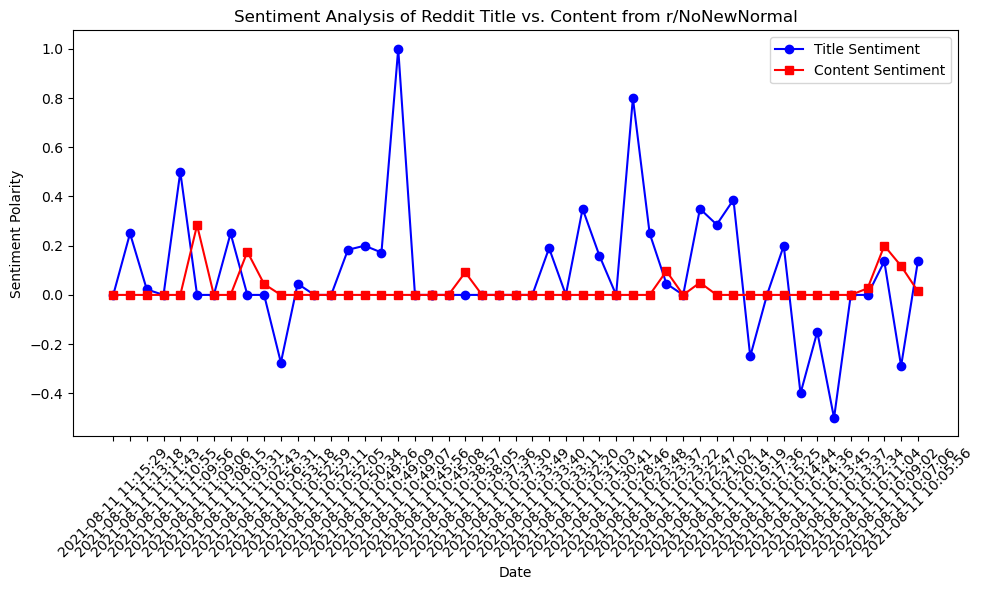

In [19]:
#create a subplot for each year's title sentiment analysis

plt.figure(figsize=(10,6))
plt.plot(title_dates, title_polarities,label='Title Sentiment', color='blue', marker='o') #plot for title sentiment
plt.plot(content_dates, content_polarities, label='Content Sentiment', color='red', marker='s') #plot for content sentiment

plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis of Reddit Title vs. Content from r/NoNewNormal')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
import os
os.system('jupyter nbconvert --to html module_7.ipynb')

0